# Research on car sales ads

In this project we are an analysts at Crankshaft List. Hundreds of free advertisements for vehicles are published on this website every day.

We need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

### Step 1. Open the data file and study the general information. 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [1]:
df = pd.read_csv("/datasets/vehicles_us.csv")

print(df.info())
print(df.head())
#print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None
   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0

### Step 1. Conclusion

At first we have imported data from the .csv-file to our system to work with python.

The dataset at least looks like a "normal" table (we don't need to use "sep" or "decimal" parameter of _read_csv()_ function, which were introduced in our current theory chapter). 

As we can see in the output, we have a few issues with the data: 

1. Some of datatypes do not suits the saved data (e.g. float64 for "cylinders", "model_year" or "is_4wd"; "date_posted", "paint_color" are object, not strings etc.). We have to handle it.

2. Some data is missing. (e.g. "is_4wd" column has only 25K of non-null objects while the table has 51K rows.

3. We don't see any duplicates in the head() method output, but we have to check it more precisely and (if necessary) to handle it. 

### Step 2. Data preprocessing

As we already knew, we have missed data in the following columns: 

_model_year_ 

_cylinders_ 

_odometer_

_paint_color_

_is_4wd_ 

At first we are going to fill in all the missing numerical values with median values for corresponding car model. We are talking about ca. 3K-7K entries in each case, it's a bit too big amount of data just to drop it. 

It's a bit difficult to say, what were the exact reasons why the data is missing. It may be human input errors/typos or some technical bugs during the data creation/preparation/extraction. 
    
At least in the case of _False_ values in the "is_4wd" column we can be sure, that it was some technical problem, that all the _False_ values bturned into _NaN_. 
    
We are filling in all the numerical values in this case. As we learnt in the theory chapter during last weeks as well as during our 1st project, using the mean value is the optimal option. 
    
(_If we can talk about personal opinion, we would say, dropping the entries with missing values can be a good option too. But the reviewer of our 1st project asked us to fill in the missing values in similar way._)

In [2]:
df['model_year'].fillna(df.groupby(['model'])['model_year'].transform('median'), inplace=True)
df['cylinders'].fillna(df.groupby(['model'])['cylinders'].transform('median'), inplace=True)
df['odometer'].fillna(df.groupby(['model'])['odometer'].transform('median'), inplace=True)
#print(df.info())

It seems that the data filling was succsessful. But we still have one issue: 41 values in "odometer" are still NaN's. We are going to handle it a bit later, but at first let's fill in the missing values in the column 'paint_color'. We have to use a bit different approach since we are handling strings and not numbers in this case. 

In [3]:
df['paint_color'] = df['paint_color'].fillna(df.groupby(['model'])['paint_color'].transform(lambda x: x.mode().iloc[0]))


#print(df.head(10))

#print(df.info())

We are filling in a non-numerical/qulitative values in this case. So we can not use the mean values, but we can find the most popular color for each car model and assume, that is also the color was missed. 
    
(_If we can talk about personal opinion, we would say, dropping the entries with missing values can be a good option too. But the reviewer of our 1st project asked us to fill in the missing values in similar way._)

Back to our 41 missing values in the "odometer" column. 

In [4]:
print(len(df[df['odometer'].isnull()]))
#print(df[df['odometer'].isnull()])

41


In [5]:
print(len(df[df['model'] == "mercedes-benz benze sprinter 2500"]))

41


We still have this problem because we had absolutly no mileage data for "mercedes-benz benze sprinter 2500". Besides all of 41 rows are identical (except the " date_posted" and "days_listed" columns). It's fishy, the data seems to be corrupted. Let's get rid of this rows. It's only 41 of 21K, so we can afford to drop it. 

To apply _dropna()_ function to all dataframe, first we are filling missing values in the "is_4wd" column with zeros. 

In [6]:
#print(df.info())

df["is_4wd"] = df["is_4wd"].fillna(0)

#print(df["is_4wd"].head())

df = df.dropna()
#print(df.info())

By the way we solved the problem of the missing values in the "is_4wd" column. 

The previous output shows, that in this column we had 25572 of 1.0(=True) values only (with other words, we had 0 of 0.0(=False) values in this column. The value in this column can be 1.0 or 0.0 (True/False). 

As the hint in our project description says, we can assume, that 25953 missing values in this column were 0 (False). The _head()_ output confirms our assumption: sedans like Honda Civic, Hyundai Sonata, Toyota Corola has not (usually) four wheels drive. 

It seems like a technical issue that caused all "0"'s were replaced by "NaN"(for example, during data convertation or similar). 

Therefore we have nothing to do with the data in this column: it was filled by "df.fillna(0)" exactly in the way we wanted to fill it. 

Now we can convert the datatypes to most suitable for each column. We are converting all datatypes to save memory and to make it more convinient for us to handle with data (e.g. to compare values as numerical datatypes, not as objects).

In [7]:
#print(df.info())

df['price']=df['price'].astype('int32')
df['model_year']=df['model_year'].astype('int16')
df['model']=df['model'].astype(str)
df['condition']=df['condition'].astype(str)
df['cylinders']=df['cylinders'].astype('int8')
df['fuel']=df['fuel'].astype(str)
df['odometer']=df['odometer'].astype('int32')
df['transmission']=df['transmission'].astype(str)
df['type']=df['type'].astype('str')
df['paint_color']=df['paint_color'].astype(str)
df['is_4wd']=df['is_4wd'].astype('bool')
df['date_posted']=df['date_posted'].astype("datetime64")
df['days_listed']=df['days_listed'].astype('int16')
 

#print(df.info())

Without dropping any data the memory usage was reduced by ca. 40% (5.5->3.8 MB). It is not really important in this particular case, but it can be very useful during the work with large datasets.

Let's check, if we have any duplicates in our dataset. 

In [8]:
print(df.duplicated().sum())

print(df.isnull().sum())

0
price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


It seems, that we have no duplicates and no NaN's in the dataset. 

### Step 2. Conclusion

We have found some missing and unreliable data in out dataset. We have preprocessed the dataset by droping unreliable date.

At the same time we have saved 7K dataframe entries where the data was partially missing. We filled out this data with median (or in one case with mode) values for each of car model. 

In one cases we also used deductive inputation and saved 26K entries in the "is_4wd" column. 

We also checked, if we have any duplicates in the dataset. 

Finally we have parsed a suitable datatypes for each column and saved about 40% of used memory. 


### Step 3. Make calculations and add them to the table

We were asked to add to the table a day of the week, month, and year the ad was placed. 

In [9]:
#print(df.head())

df["day_of_the_week"] = df["date_posted"].dt.weekday

df["month_of_ad"] = df["date_posted"].dt.month

df["year_of_ad"] = df["date_posted"].dt.year

#print(df.head())

We were asked to add to the table the vehicle's age (in years) when the ad was placed

In [10]:
df["age_of_vh"] = df["year_of_ad"] - df["model_year"]

#print(df.head())

We were asked to add to the table the vehicle's average mileage per year. It would be very simple to divide "odometer" column by "age_of_vh" column. But we have some zero values in "age_of_vh" column. That's why we have to use a trick to make this calculation possible. We add to our table a temporary column with all values from "age_of_vh" column and sustitute all the 0 values in by 1. After performing our calculations we are dropping the temporary column. 

We are saving the mileage as integers to save memory because the figures after decimal point are not really important in this case. 

In [11]:
df["age_of_vh_temp"] = df["age_of_vh"]

#print(len(df[df["age_of_vh_temp"]== 0]))

df["age_of_vh_temp"].replace(to_replace=0, value=1, inplace=True)

#print(len(df[df["age_of_vh_temp"]== 0]))

df["average_mileage"] = df["odometer"] // df["age_of_vh_temp"]

df['average_mileage']=df['average_mileage'].astype('int32')

del df['age_of_vh_temp']

We were asked to replace the car's condition evaluation with corresponding numerical school-like grade. 

In [12]:
def grades(condition):
    
    if "like new"  in condition:
        return "4"
    if "new" in condition:
        return "5"
    if "excellent" in condition:
        return "3"
    if "good" in condition:
        return "2"
    if "fair" in condition:
        return "1"
    if "salvage" in condition:
        return "0"
    else:
        return "other"
    
df['condition'] = df['condition'].apply(grades)

df['condition']=df['condition'].astype('int8')

#print(df.head())
#print(df.info())


We used an analog function as we had used in our first project and after that we have parsed a new suitable datatype for the 'condition' column. 

We are saving the condition grade as an _int8_ to save memory because we deal here with the numbers 0...5 only. 

### Step 3. Conclusion

The Step 3 in general was pretty simple: we just calculated and added some new values to the table as a new columns and substituted the car's condition evaluation with corresponding numerical grade. This help us to conduct a further analysis. 

### Step 4. Carry out exploratory data analysis

We were asked to study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition by ploting histograms for each of these parameters.

It's a bit to boring, to draw many historgams without a loop. Next time we'll find another option. (If you know a more efficient way to make the task done, please let us know.)


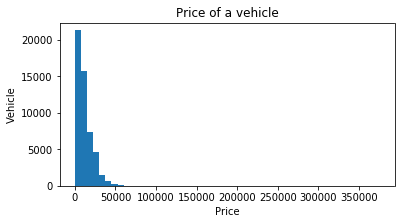

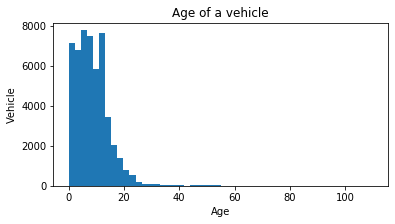

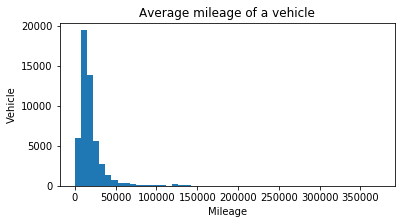

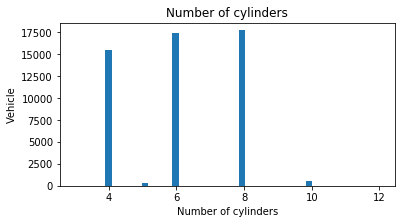

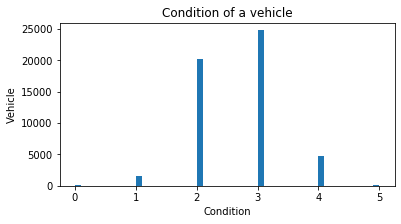

In [13]:
#data.columns = ["price", "age_of_vh", "average_mileage", "cylinders", "condition"]

df['price'].hist(bins=50, figsize=(6, 3),label = 'Price of a car', grid=False)

plt.title('Price of a vehicle')
plt.xlabel('Price')
plt.ylabel('Vehicle')

plt.show()

df['age_of_vh'].hist(bins=50, figsize=(6, 3),grid=False)

plt.title('Age of a vehicle')
plt.xlabel('Age')
plt.ylabel('Vehicle')

plt.show()

df['average_mileage'].hist(bins=50, figsize=(6, 3),grid=False)

plt.title('Average mileage of a vehicle')
plt.xlabel('Mileage')
plt.ylabel('Vehicle')

plt.show()

df['cylinders'].hist(bins=50, figsize=(6, 3),grid=False)

plt.title('Number of cylinders')
plt.xlabel('Number of cylinders')
plt.ylabel('Vehicle')

plt.show()

df['condition'].hist(bins=50, figsize=(6, 3),grid=False)

plt.title('Condition of a vehicle')
plt.xlabel('Condition')
plt.ylabel('Vehicle')
plt.show()

The discription/conclusion for each of the graphs: 
    
1. Price.  
We obviousely have a lot of outliers in the "price" column: it is impossible, that 20K+ cars in our dataset has a price slightly above zero. The rest of the prices looks normal. 

2. Age. 
The graph shows, that most of the cars in our dataset are younger than 12 years. People sells mostly cars which are yonger then 10 or in the age od 12-13 years. The trench on the graph in the 10-11 years old cars is a bit weird. We have not found an explanation for this gap. 

3. Number of cylinders.
The graph shows, that mostly vehicles for sale has 4, 6 or 8 cylinders. There are also some with 5, 10 or 12 ones, but it is a clear-cut minority. This data is consistent with our understanding of the U.S. car market. 

4. Condition. 
The most of the vehicles for sale are in the 2nd and 3rd condition group ("excellent"/"good"), there are some cars in 1st and 4th groupes ("like new"/"fair") and only a few are in groups nr. 0 and 5 ("new"/"salvage"). This data is consistent with our understanding of the U.S. used car market. 


How can we interpret this histograms? 

We obviousely have a lot of outliers in the "price" column: there are to many cars with the price slightly above zero. In consequence of this the skewness of the histogram is explicitly positive.

In [14]:
print(len(df[df["price"]<2]))

print(len(df[df["price"]<10]))

print(len(df[df["price"]<100]))

#print(((df[df["price"]<10])).head(10))

#df["price"].describe()

798
802
863


We were right: according to our data, almost 800 can be alegedly purchused for less then 2 (dollars?) each. About 60 cars has price less than 100 (dollars?) each. Scrap the car will be more profitable. 

It is an obviously incorrect data: a seller sets unrealistically low price to get more customers views. And to be on top, if a customer sorts cars by price (low to high).

We have to consider this information in our further analysis. 

The "age_of_vh"column also has a lot of records close to zero mark. May be this are also outliers? 

In [15]:
print(len(df[df["age_of_vh"]<1]))

#print(((df[df["age_of_vh"]<1])).tail(10))

#print(df[df["age_of_vh"]<1].min())
#print(df[df["age_of_vh"]<1].max())

2152


This data seems to be right: although we have 2152 new cars in our dataset, they all were produced in 2018-2019, in the years as the ads were posted. 

We alse can see on the "age" histogram, that some of cars are extremly old (40+), we have to consider this information in our further analysis. 

In [16]:
print(len(df[df["age_of_vh"]>40]))

#print(df[df["age_of_vh"]>40].head(20))
#print(df[df["age_of_vh"]>40].tail(20))

#print(len(df[df["age_of_vh"]>60]))

#print(df[df["age_of_vh"]>60])

#print(df[df["age_of_vh"] == 71])



163


163 cars in the dataset are 40+, it seems to be okay, but we also have 8 cars 60+ an this entries are partially fishy: 

  - gmc yukon was not manufactured in 1908; 
  - cadillac escalade was not manufactured in 1908; 
  - chevrolet impala was not manufactured in 1948.
    
We are going to drop this three entries. 
    
The 5 other car in this list (according to Wikipedia munufacturing years data) can be truly oldtimers.

The "average_mileage" histogram looks at first "normal" with slightly positive skewness, but corresponding to the "age_of_vh" column. But let's check the outliers.

In [17]:
print(len(df[df["average_mileage"] == 0]))

#print(df[df["average_mileage"]== 0].head(10))

print(len(df[df["average_mileage"] < 2000]))

#print(df[df["average_mileage"] < 2000].head(10))




220
1313


We have 220 cars with 0 mileage, and this are not new cars, so it is obvious icrorrect/ incomplete data, which was not really entered in the databank. 

We have 1313 cars with mileage < 2000 per annum, what is not really trustworthy. We have to consider this information in our further analysis. 

The "cylinders" histogram looks at first "normal" too. (Except the fact that this type of diagram is not very suitable for displaying this kind of information.) Let's check the outliers.

In [18]:
print(len(df[df["cylinders"]<4]))
print(len(df[df["cylinders"]<3]))
#print(df[df["cylinders"]<4].head(10))

print(len(df[df["cylinders"]>8]))

#print(df[df["cylinders"]>8].head(10))


34
0
551


34 cars with 3 cylinders-motors and 0 cars with a motor with 0, 1 or 2 cylinders is a very good result. 

551 (ca. 1% of all amount) cars with very big engines also look allright.

The outliers in the "condition" column/histogram looks okay. (Except the fact that this type of diagram is not very suitable for displaying this kind of information.)

In [19]:
print(len(df[df["condition"] == 0]))
print(len(df[df["condition"] == 5]))

115
143


Let's create a new dataframe and remove outliers from the new dataframe.

In [20]:
years =  [1908, 1948]

df_filtered = df.copy()

df_filtered["price"] = df_filtered.query('price > 2000')

df_filtered["model_year"] = df_filtered.query('model_year not in @years')

df_filtered["average_mileage"] = df_filtered[df_filtered["average_mileage"] > 4000]["average_mileage"]

df_filtered = df_filtered.dropna()

df_filtered = df_filtered.reset_index()

#print(df_filtered.info())

df_filtered['index']=df_filtered['index'].astype('int32')
df_filtered['day_of_the_week']=df_filtered['day_of_the_week'].astype('int8')
df_filtered['month_of_ad']=df_filtered['month_of_ad'].astype('int8')
df_filtered['year_of_ad']=df_filtered['year_of_ad'].astype('int16')
df_filtered['year_of_ad']=df_filtered['year_of_ad'].astype('int16')
df_filtered['age_of_vh']=df_filtered['age_of_vh'].astype('int8')
df_filtered['price']=df_filtered['price'].astype('int32')
df_filtered['average_mileage']=df_filtered['average_mileage'].astype('int32')

#print(df_filtered.info())


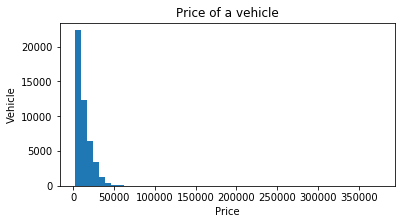

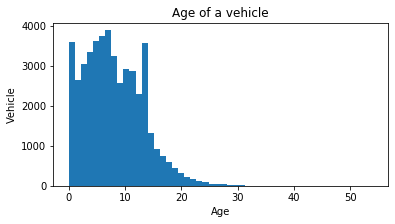

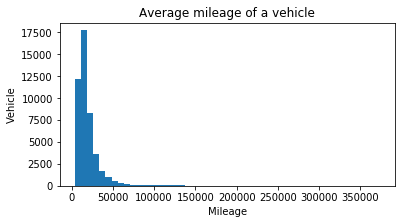

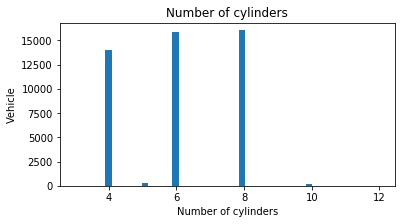

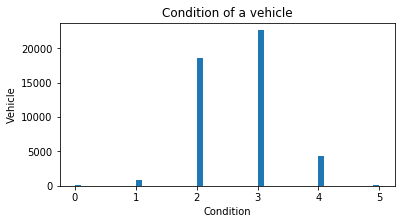

In [21]:
df_filtered['price'].hist(bins=50, figsize=(6, 3),grid=False)

plt.title('Price of a vehicle')
plt.xlabel('Price')
plt.ylabel('Vehicle')

plt.show()

df_filtered['age_of_vh'].hist(bins=50, figsize=(6, 3),grid=False)

plt.title('Age of a vehicle')
plt.xlabel('Age')
plt.ylabel('Vehicle')

plt.show()

df_filtered['average_mileage'].hist(bins=50, figsize=(6, 3),grid=False)

plt.title('Average mileage of a vehicle')
plt.xlabel('Mileage')
plt.ylabel('Vehicle')

plt.show()

df_filtered['cylinders'].hist(bins=50, figsize=(6, 3),grid=False)

plt.title('Number of cylinders')
plt.xlabel('Number of cylinders')
plt.ylabel('Vehicle')

plt.show()

df_filtered['condition'].hist(bins=50, figsize=(6, 3),grid=False)

plt.title('Condition of a vehicle')
plt.xlabel('Condition')
plt.ylabel('Vehicle')

plt.show()


The discription/conclusion for each of the filtered graphs: 
    
1. Price  
We obviousely have a much less outliers in the "price" column. The graph looks "normal" now and apparently shows the negative correlation btw. age and price, as we were expected. 

2. Age  
We didn't change the corresponding data. The graph still shows, that most of the cars in our dataset are younger than 12 years. People sells mostly cars which are yonger then 10 or in the age od 12-13 years. The trench on the graph in the 10-11 years old cars is a bit weird. We have not found an explanation for this gap. 

3. Number of cylinders  
We didn't change the corresponding data. The graph still shows, that mostly vehicles for sale has 4, 6 or 8 cylinders. There are also some with 5, 10 or 12 ones, but it is a clear-cut minority. This data is consistent with our understanding of the U.S. car market. 

4. Condition  
We didn't change the corresponding data. The most of the vehicles for sale are still in the 2nd and 3rd condition group ("excellent"/"good"), there are some cars in 1st and 4th groupes ("like new"/"fair") and only a few are in groups nr. 0 and 5 ("new"/"salvage"). This data is consistent with our understanding of the U.S. used car market. 


Let's compare the new histograms with the it's previous version. 

All of them looks very similar to the corresponding original one. 

Age, condition an cylinders we have not filtered at all.


(Probably we have missed something in this analyzing step, any advice would be more than appreciated.)

Let's study how many days advertisements were displayed.

39.574184104021356
33.0


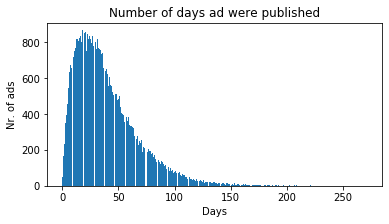

In [22]:
print(df_filtered['days_listed'].mean())
print(df_filtered['days_listed'].median())


df_filtered['days_listed'].hist(bins=300, figsize=(6, 3),grid=False)

plt.title('Number of days ad were published')
plt.xlabel('Days')
plt.ylabel('Nr. of ads')

plt.show()



As the histogram and median value shows, that a typical lifetime of an ad is about 33 days. The easy noticeable positive skewness of the histogram also says, that some ads were also online much longer, that's why the mean value is higher than the median. 

Let's find out, when ads were removed quickly, and when they were listed for an abnormally long time. 

There is no rule, what is in this case "quickly" and what is "an abnormally long time". Let's say, if the ad was removed during 3 days after publishing, it is pretty quickly. And the ads were online more than 5 months, we are going to call "an abnormally long time". We have found 442 advertisements of the 1st and 217 of the 2nd kind. 

In [23]:
print(len(df_filtered[df_filtered['days_listed'] < 3]))

print(len(df_filtered[df_filtered['days_listed'] > 150]))


442
217


Let's analyze the number of ads and the average price for each type of vehicle. 

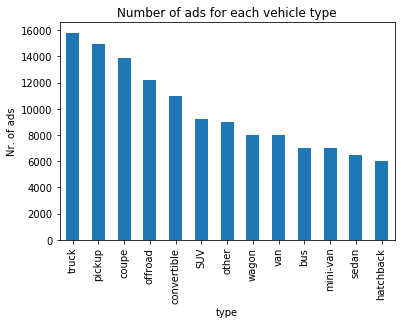

In [24]:
type_stat_median = df_filtered.pivot_table(index = "type", values = ["price"], aggfunc = 'median')

plt.title('Number of ads for each vehicle type')
plt.xlabel('Vehicle type')
plt.ylabel('Nr. of ads')

type_stat_median["price"].sort_values(ascending=False).plot(kind = "bar");

As far as we have no (and we do not really need) number of ads as a separat column in our dataset(but the length of the dataset is equal to the number of ads), it's enough to make a pivot table as we made in the cell above. As we can see on the histogram, the two types with the greatest number of ads are trucks and pickups. 

It's time to check, what factors impact the price most? 

       age_of_vh  price
index                  
22            15   7500
39            10   8000
50            12   6200
53             7  10400
60            14  13000


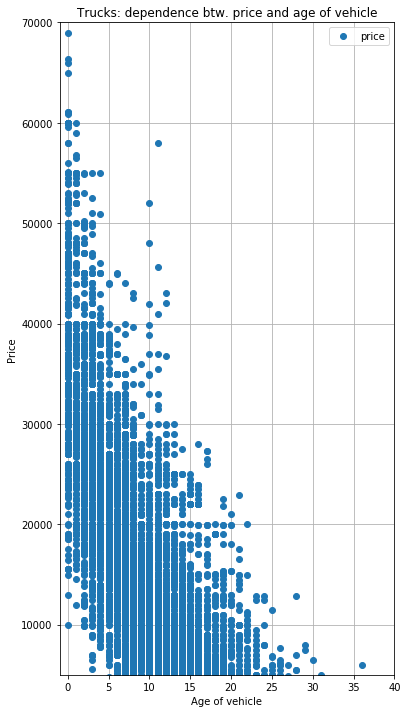

In [25]:
trucks = df_filtered.query('type == "truck"')

trucks_stat_age = trucks.pivot_table(index = "index", values = ["price", "age_of_vh"], aggfunc = 'median')

print(trucks_stat_age.head())



trucks_stat_age.plot(x='age_of_vh', y='price', style='o', xlim=(-1, 40), ylim=(5000, 70000),  grid=True, figsize=(6, 12))

plt.title('Trucks: dependence btw. price and age of vehicle')
plt.xlabel('Age of vehicle')
plt.ylabel('Price'); 

We can see a clear negative correlation between the age and price of trucks on the histogram: the youngest trucks are the most expensive ones. Correspondingly, the more elderer it is, the lower goes the price. 

The Pearson correlation corfficient -0.62 shows, that the negative correlation exists, and it relatively strong. 

In [26]:
print(trucks['age_of_vh'].corr(trucks['price']))

-0.6160029492096992


We have to compare many parameters at this task, so let's look at the correlation matrix to check them all: 

In [27]:
#print(trucks.corr())

As we can see in the "price" column, the two strongest correlations are btw. price and age of vechicle(negative, -0.62) and btw. price and model_year (0.62). The mileage ("odometer") also negatively affects the price with Pearson correlation corfficient ca. -0.47, that seems to be absolutly logical. 

Condition, average_milelage and the fact whether the vehicle has 4-wheel drive are also affects the price, but but less strongly. 

Let's create in a similar vein other graphs we were asked to do.

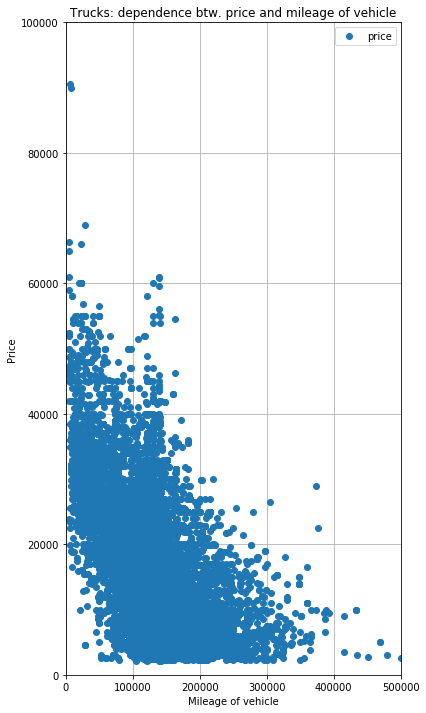

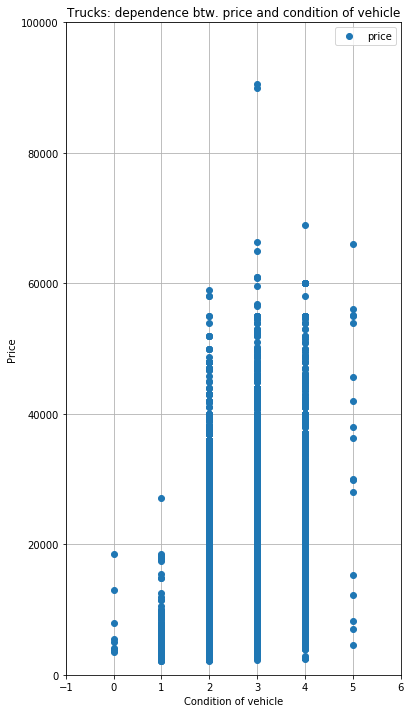

In [28]:
trucks_stat_mileage = trucks.pivot_table(index = "index", values = ["price","odometer"], aggfunc = 'median')

trucks_stat_condition = trucks.pivot_table(index = "index", values = ["price", "condition"], aggfunc = 'median')

#print("Mileage/price correlation and Condition/price correlation")

trucks_stat_mileage.plot(x='odometer', y='price', style='o', xlim=(-10, 500000), ylim=(0, 100000),  grid=True, figsize=(6, 12))

plt.title('Trucks: dependence btw. price and mileage of vehicle')
plt.xlabel('Mileage of vehicle')
plt.ylabel('Price'); 

trucks_stat_condition.plot(x='condition', y='price', style='o', xlim=(-1, 6), ylim=(0, 100000),  grid=True, figsize=(6, 12))

plt.title('Trucks: dependence btw. price and condition of vehicle')
plt.xlabel('Condition of vehicle')
plt.ylabel('Price'); 


The first scatterplot also shows the obviouse negative mileage/price correlation. 

The correlation on the second scatterplot is not so optical clear-cut. 

Now we are going to perform the same analysis for the 2ns popular car type - pickups. After that we'll do the same analysis for the categorical variables with a bit another approach. 

In [29]:
#print(pickups.corr())

As we can see in the "price" column of correlation matrix, in case of pickups there are also two strongest correlations are btw. price and age of vechicle(negative, -0.66) and btw. price and model_year (0.66). The mileage ("odometer") affects the price of a pickup even more negatively with the Pearson correlation corfficient ca. -0.55. 

Condition, average_milelage and the fact whether the pickup has 4-wheel drive are also affects the price, but but less strongly. All given in this cell comparisons are with the trucks we analyzed earlier. 

You can find the corresponding graphs in the next cell. 

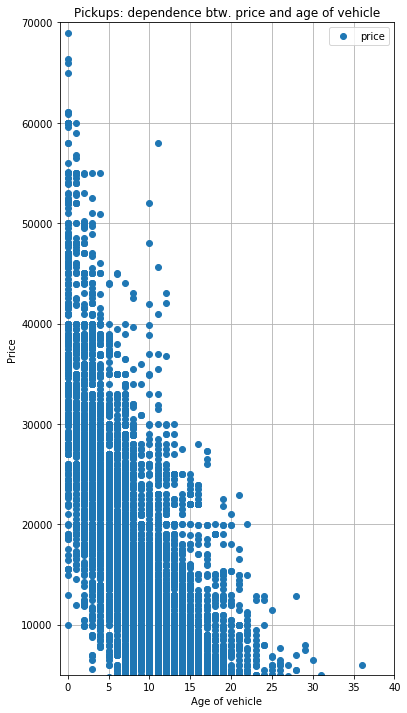

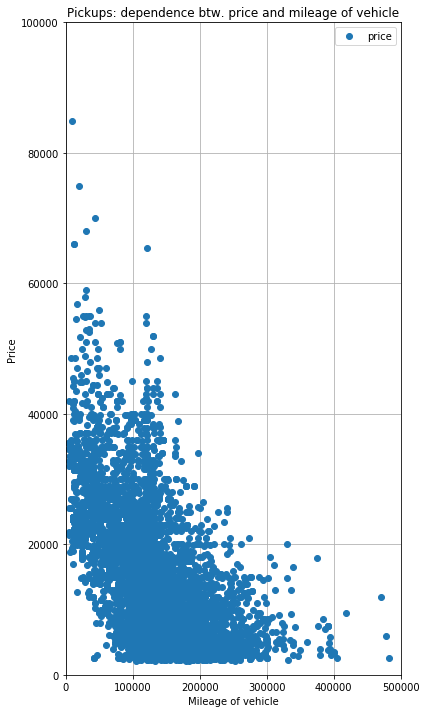

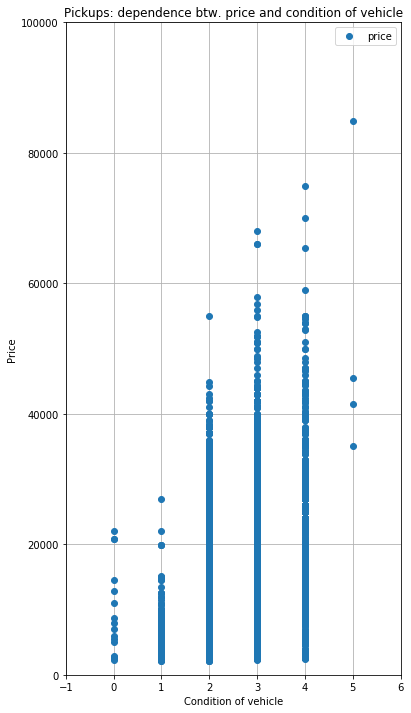

In [30]:
pickups = df_filtered.query('type == "pickup"')

pickups_stat_age = trucks.pivot_table(index = "index", values = ["price", "age_of_vh"], aggfunc = 'median')

pickups_stat_age.plot(x='age_of_vh', y='price', style='o', xlim=(-1, 40), ylim=(5000, 70000),  grid=True, figsize=(6, 12))

plt.title('Pickups: dependence btw. price and age of vehicle')
plt.xlabel('Age of vehicle')
plt.ylabel('Price'); 

pickups_stat_mileage = pickups.pivot_table(index = "index", values = ["price","odometer"], aggfunc = 'median')

pickups_stat_condition = pickups.pivot_table(index = "index", values = ["price", "condition"], aggfunc = 'median')

pickups_stat_mileage.plot(x='odometer', y='price', style='o', xlim=(-10, 500000), ylim=(0, 100000),  grid=True, figsize=(6, 12))

plt.title('Pickups: dependence btw. price and mileage of vehicle')
plt.xlabel('Mileage of vehicle')
plt.ylabel('Price'); 

pickups_stat_condition.plot(x='condition', y='price', style='o', xlim=(-1, 6), ylim=(0, 100000),  grid=True, figsize=(6, 12))

plt.title('Pickups: dependence btw. price and condition of vehicle')
plt.xlabel('Condition of vehicle')
plt.ylabel('Price'); 



And now let's perform the same analysis for the categorical variables. At first we have to filter values with 50 or less appearance in "color" column. In the "transmission" column we do not need to change something.  

In [31]:
#print(trucks["transmission"].value_counts())

print(trucks["paint_color"].value_counts())

trucks["paint_color"] = trucks["paint_color"][(trucks.paint_color != "orange") & (trucks.paint_color != "purple")]

print(trucks["paint_color"].value_counts())




white     5413
black     1443
silver     980
red        975
grey       912
blue       826
custom     289
brown      224
green      219
yellow      60
orange      47
purple      12
Name: paint_color, dtype: int64
white     5413
black     1443
silver     980
red        975
grey       912
blue       826
custom     289
brown      224
green      219
yellow      60
Name: paint_color, dtype: int64


There is probably a more elegant way to filter the data we would like to know, but this one works too. 

Now we can draw our graphs. 

In [32]:
trucks_stat_color = trucks.pivot_table(index = "paint_color", values = "price", aggfunc = 'median')
trucks_stat_transmission = trucks.pivot_table(index = "transmission", values = "price", aggfunc = 'median')
trucks_stat_color = trucks_stat_color.reset_index()

print(trucks_stat_color)
print(trucks_stat_transmission)

  paint_color  price
0       black  17999
1        blue  14500
2       brown  11745
3      custom  14500
4       green   8500
5        grey  15490
6         red  13000
7      silver  14500
8       white  15995
9      yellow  17490
                price
transmission         
automatic     15900.0
manual         8475.0
other         15695.5


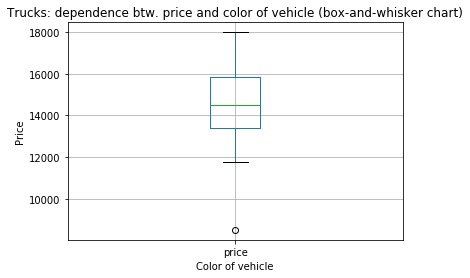

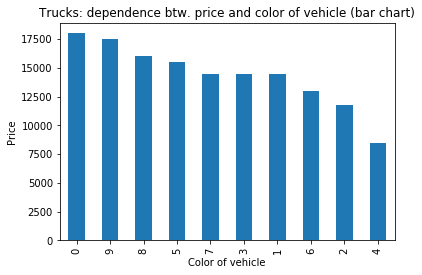

In [33]:
trucks_stat_color.boxplot()


plt.title('Trucks: dependence btw. price and color of vehicle (box-and-whisker chart)')
plt.xlabel('Color of vehicle')
plt.ylabel('Price'); 

plt.show()

trucks_stat_color["price"].sort_values(ascending=False).plot(kind = "bar")

plt.title('Trucks: dependence btw. price and color of vehicle (bar chart)')
plt.xlabel('Color of vehicle')
plt.ylabel('Price'); 


According to out task we have printed out the box-and-whisker chart. But it is a bit difficult to analyze, that's why we also printed out the corresponding bar chart. 

We can state, that the color of a truck really affects the price! Black and yellow are two most expensive colors. Green is the least expensive one. 

And now we are going to build the graphs for transmission of trucks: 

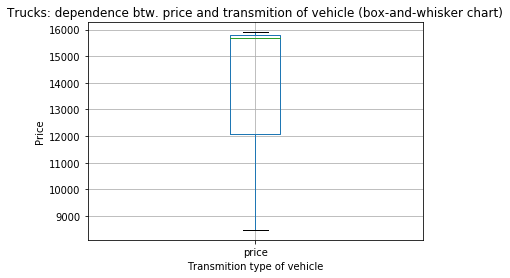

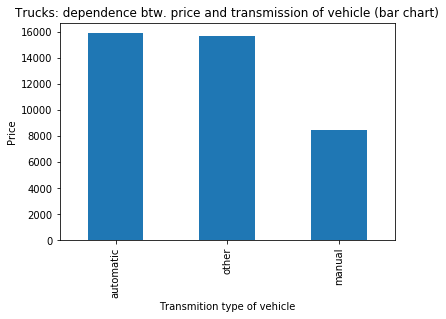

In [34]:
trucks_stat_transmission.boxplot()

plt.title('Trucks: dependence btw. price and transmition of vehicle (box-and-whisker chart)')
plt.xlabel('Transmition type of vehicle')
plt.ylabel('Price'); 
plt.show()

trucks_stat_transmission["price"].sort_values(ascending=False).plot(kind = "bar")

plt.title('Trucks: dependence btw. price and transmission of vehicle (bar chart)')
plt.xlabel('Transmition type of vehicle')
plt.ylabel('Price'); 

According to out task we have printed out the box-and-whisker chart. But it is a bit difficult to analyze, that's why we also printed out the corresponding bar chart. 

We can state, that the transmission type really affects the price! Automatic (and apparently it's variants in "other" column) are almost twice expensive than manual one. 

And now we are going to build analog graphs for pickups: 

In [35]:
#print(pickups["transmission"].value_counts())

#print(pickups["paint_color"].value_counts())

pickups["paint_color"] = pickups["paint_color"][(pickups.paint_color != "orange") & (pickups.paint_color != "purple") & (pickups.paint_color != "custom") & (pickups.paint_color != "yellow")]

#print(pickups["paint_color"].value_counts())

In [36]:
pickups_stat_color = pickups.pivot_table(index = "paint_color", values = "price", aggfunc = 'median')
pickups_stat_transmission = pickups.pivot_table(index = "transmission", values = "price", aggfunc = 'median')
pickups_stat_color = pickups_stat_color.reset_index()

print(pickups_stat_color)
print(pickups_stat_transmission)

  paint_color    price
0       black  18500.0
1        blue  13500.0
2       brown  16995.0
3       green   7850.0
4        grey  13990.0
5         red  10972.5
6      silver  15497.5
7       white  14995.0
              price
transmission       
automatic     13990
manual         6000
other         23000


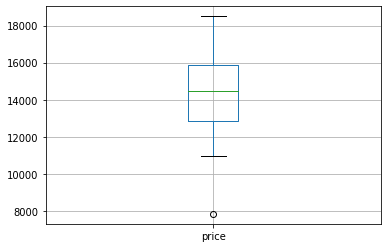

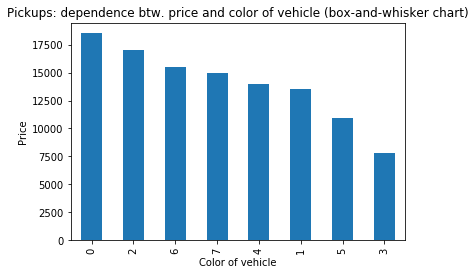

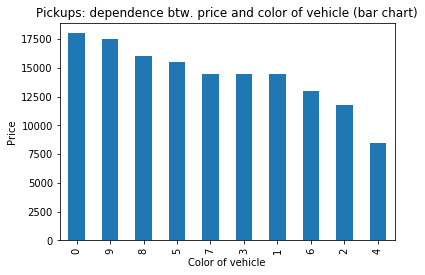

In [37]:
pickups_stat_color.boxplot()
plt.show()

pickups_stat_color["price"].sort_values(ascending=False).plot(kind = "bar") 

plt.title('Pickups: dependence btw. price and color of vehicle (box-and-whisker chart)')
plt.xlabel('Color of vehicle')
plt.ylabel('Price'); 

plt.show()

trucks_stat_color["price"].sort_values(ascending=False).plot(kind = "bar")

plt.title('Pickups: dependence btw. price and color of vehicle (bar chart)')
plt.xlabel('Color of vehicle')
plt.ylabel('Price'); 

As we mentioned above, according to out task we have printed out the box-and-whisker chart. But it is a bit difficult to analyze, that's why we also printed out the corresponding bar chart. 

We can state, that the color of a pickup really affects the price! Black and brown are two most expensive colors. Green is also the least expensive one - green pickups cost twice less than a black one! 

And now we are going to build the graphs for transmission of trucks: 

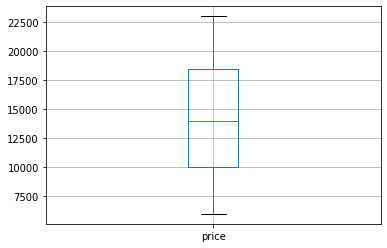

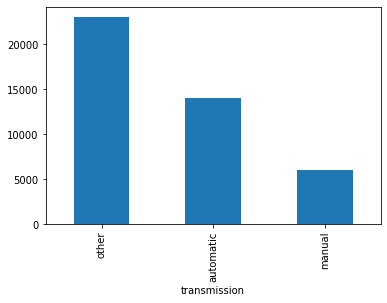

In [38]:
pickups_stat_transmission.boxplot()
plt.show()

pickups_stat_transmission["price"].sort_values(ascending=False).plot(kind = "bar") 

We can state, that the transmission type really affects the price! 

"Other" is even the most expensive one, Automatic is still more than twice expensive than manual one. 

### Step 4. Сonclusion

In step 4 we carried out an exhaustively exploratory data analisis. We studied such parameters, like price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. We plotted histograms for each of these parameters, studied how outliers affect the form and readability of the histograms and removed them for our further analysis, and plotted new histograms without outliers.

We also studied, how many days advertisements were usually displayed (33) and what the boundary cases(very short/very long displaying time - 0/200+ days) were.

We analyzed the number of ads and the average price for each type of vehicle. We plotted a graph showing the dependence of the number of ads on the vehicle type. We found, that trucks and pickups are the two types of cars with the greatest number of ads on our website.

Finally we checked, what factors impact the price most. That are age, mileage, transmission type and color. Black is still the most popular one (at least in trucks and pickup categories), as Henry Ford instructed us almost 100 years ago. 


### Step 5. Overall conclusion

In this project we performed an exhaustively research on car sales ads at Crankshaft List. 

We got a bunch of raw data; some information was missing (we have filled out the most missing values with interpolation to save incomlete entries), some other information was corrupted (we dropped some of data that could not be revised.

We also processed the data in out dataset by casting the optimal datatype for each column. Therefore we saved almost 40% of used memory without reducing our amount of data. 

We analyzed about 50K ad entries collected over the last few years on our website and determined which factors influence the price of a vehicle. That are age, mileage, transmission type and color. Black is still the most popular(ups the price) car color. 

During our research we widely used exploratory data analysis techniques, we plottet dozens of  charts of different kinds. 

We found out, that a tipical time of an ad is about 33 days, but the rage is very bright, in some cases up to 300 days.

We also propose to conduct a further research and find out, that factors impact, that a car is sold faster than others. 

Obtained date can be used for updating websits sections and creating special offers and advices for our customers how to create . 